In [ ]:
#Mounting drive
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Performing the necessary importations 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline

QUESTION 1 : Demonstrate the data preparation $ feature extraction process

In [ ]:
# Reading dataset "players_20.csv"

df=pd.read_csv('/content/drive/MyDrive/archive/players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
# Viewing the shape 
df.shape

(18278, 104)

In [ ]:
# Dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
# Calculating correlations 
df.corr()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.445061,0.042015,-0.159848,-0.228084,-0.360765,-0.092250,-0.079645,-0.143372,0.178376,0.144401,0.103580,0.162112,-0.274248,-0.367527,-0.222207,-0.225230,-0.370582,-0.395903,-0.414772,-0.350622,-0.378179,-0.346197,-0.478916,-0.137097,-0.098612,-0.120116,-0.146427,-0.166148,-0.045166,-0.172646,-0.200029,-0.199998,-0.110933,0.119183,0.117895,-0.032759,-0.439012,0.040989,-0.283919,-0.189141,-0.077519,-0.279780,-0.178362,-0.232305,-0.164695,-0.102409,-0.229932,-0.147125,-0.385061,-0.131479,-0.087414,-0.068464,-0.113073,-0.116270,-0.114658,-0.123064,-0.113487
age,-0.736680,1.000000,0.081391,0.237169,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,0.045277,0.065748,-0.225014,-0.122691,-0.119590,-0.201211,0.238990,0.330507,0.161913,0.259990,0.435292,0.429622,0.466477,0.404785,0.418794,0.338096,0.550246,0.128189,0.078531,0.149946,0.135681,0.143063,0.016735,0.141891,0.190419,0.184008,0.088359,-0.153145,-0.144310,-0.023131,0.463331,-0.089609,0.261916,0.185964,0.115859,0.341852,0.161616,0.260420,0.196346,0.086503,0.195372,0.141375,0.370149,0.157007,0.116857,0.101534,0.110313,0.112929,0.112615,0.121381,0.111811
height_cm,-0.093464,0.081391,1.000000,0.768816,0.039945,-0.002432,0.009527,0.019547,0.037935,-0.175200,-0.429980,0.010941,-0.032257,-0.013972,-0.096292,-0.432158,-0.203716,-0.290623,-0.413370,0.216422,0.490354,0.142825,0.152043,0.081560,0.134570,-0.018340,0.151743,-0.498103,-0.376091,0.010296,-0.371445,-0.351059,-0.500107,-0.447578,-0.410071,-0.335343,-0.425013,-0.558354,-0.474736,-0.633770,-0.019698,-0.789806,-0.174280,-0.041149,-0.291791,0.535400,-0.384213,-0.045307,-0.053148,-0.445302,-0.371546,-0.335786,-0.159296,-0.077038,-0.068334,-0.076953,0.367433,0.367163,0.364992,0.367097,0.367375
weight_kg,-0.203620,0.237169,0.768816,1.000000,0.156522,-0.011738,0.051782,0.065946,0.090854,-0.128568,-0.352060,0.048097,-0.081534,-0.027106,-0.092677,-0.387138,-0.095442,-0.182688,-0.300792,0.218564,0.581971,0.254839,0.269460,0.213008,0.244762,0.078373,0.287172,-0.401643,-0.291504,0.039679,-0.291090,-0.260903,-0.415861,-0.349230,-0.310277,-0.259906,-0.340154,-0.493125,-0.420978,-0.545514,0.090986,-0.669125,-0.055855,0.031246,-0.219505,0.614334,-0.279097,0.030643,-0.028345,-0.355329,-0.280242,-0.246309,-0.054167,-0.049683,-0.052770,-0.064492,0.342329,0.343211,0.339805,0.344397,0.343126
overall,-0.445061,0.464305,0.039945,0.156522,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,0.401261,0.631286,-0.192031,0.154458,-0.103241,0.158866,0.497881,0.683954,0.601190,0.334792,0.517214,0.948912,0.925025,0.790903,0.947823,0.480652,0.944758,0.389078,0.342372,0.345784,0.503157,0.394152,0.370639,0.415521,0.389790,0.487289,0.457052,0.186320,0.199009,0.253464,0.864526,0.103872,0.567504,0.267553,0.370344,0.361543,0.425081,0.399434,0.315582,0.356025,0.509251,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
# Checking for missing values

df.isna().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [ ]:
# Dropping unecessary columns )


df.columns
z = (df.iloc[: , 78: ]).columns

df1= df.loc[:,~df.columns.isin(z)]
df1.head()


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [ ]:
df1.columns



Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_

In [ ]:
#dropping unnecessary columns

df2 = df1.drop([ 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','loaned_from', 'joined',
       'contract_valid_until', 'body_type', 'real_face', 'release_clause_eur', 'player_tags','long_name','skill_moves', 'international_reputation','dob','sofifa_id','player_url', 'sofifa_id', 'player_url','gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','weak_foot', 'value_eur', 'wage_eur' ], axis=1)
df2.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,work_rate,team_position,team_jersey_number,nation_position,nation_jersey_number
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,"RW, CF, ST",Left,Medium/Low,RW,10.0,NaN,NaN
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,"ST, LW",Right,High/Low,LW,7.0,LS,7.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,"LW, CAM",Right,High/Medium,CAM,10.0,LW,10.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,GK,Right,Medium/Medium,GK,13.0,GK,1.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,"LW, CF",Right,High/Medium,LW,7.0,LF,10.0


In [ ]:
#checking for null values

df2.isna().sum()

short_name                  0
age                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
player_positions            0
preferred_foot              0
work_rate                   0
team_position             240
team_jersey_number        240
nation_position         17152
nation_jersey_number    17152
dtype: int64

In [ ]:
#replacing null values with zeros 

df2 = df2.fillna(0.0)

In [ ]:
df2.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,work_rate,team_position,team_jersey_number,nation_position,nation_jersey_number
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,"RW, CF, ST",Left,Medium/Low,RW,10.0,0,0.0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,"ST, LW",Right,High/Low,LW,7.0,LS,7.0
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,"LW, CAM",Right,High/Medium,CAM,10.0,LW,10.0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,GK,Right,Medium/Medium,GK,13.0,GK,1.0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,"LW, CF",Right,High/Medium,LW,7.0,LF,10.0


In [ ]:
#checking if null values still exist 

df2.isna().sum()

short_name              0
age                     0
height_cm               0
weight_kg               0
nationality             0
club                    0
overall                 0
potential               0
player_positions        0
preferred_foot          0
work_rate               0
team_position           0
team_jersey_number      0
nation_position         0
nation_jersey_number    0
dtype: int64

In [ ]:
#Overview of dataframe 

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   short_name            18278 non-null  object 
 1   age                   18278 non-null  int64  
 2   height_cm             18278 non-null  int64  
 3   weight_kg             18278 non-null  int64  
 4   nationality           18278 non-null  object 
 5   club                  18278 non-null  object 
 6   overall               18278 non-null  int64  
 7   potential             18278 non-null  int64  
 8   player_positions      18278 non-null  object 
 9   preferred_foot        18278 non-null  object 
 10  work_rate             18278 non-null  object 
 11  team_position         18278 non-null  object 
 12  team_jersey_number    18278 non-null  float64
 13  nation_position       18278 non-null  object 
 14  nation_jersey_number  18278 non-null  float64
dtypes: float64(2), int6

In [ ]:
#factorizing the object types 

df2['short_name'], _ = pd.factorize(df2['short_name'])
df2['preferred_foot'], _ = pd.factorize(df2['preferred_foot'])
df2['work_rate'], _ = pd.factorize(df2['work_rate'])
df2['team_position'], _ = pd.factorize(df2['team_position'])
df2['nation_position'], _ = pd.factorize(df2['nation_position'])
df2['nationality'], _ = pd.factorize(df2['nationality'])
df2['club'], _ = pd.factorize(df2['club'])
df2['player_positions'], _ = pd.factorize(df2['player_positions'])
df2.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,work_rate,team_position,team_jersey_number,nation_position,nation_jersey_number
0,0,32,170,72,0,0,94,94,0,0,0,0,10.0,0,0.0
1,1,34,187,83,1,1,93,93,1,1,1,1,7.0,1,7.0
2,2,27,175,68,2,2,92,92,2,1,2,2,10.0,2,10.0
3,3,26,188,87,3,3,91,93,3,1,3,3,13.0,3,1.0
4,4,28,175,74,4,4,91,91,4,1,2,1,7.0,4,10.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   short_name            18278 non-null  int64  
 1   age                   18278 non-null  int64  
 2   height_cm             18278 non-null  int64  
 3   weight_kg             18278 non-null  int64  
 4   nationality           18278 non-null  int64  
 5   club                  18278 non-null  int64  
 6   overall               18278 non-null  int64  
 7   potential             18278 non-null  int64  
 8   player_positions      18278 non-null  int64  
 9   preferred_foot        18278 non-null  int64  
 10  work_rate             18278 non-null  int64  
 11  team_position         18278 non-null  int64  
 12  team_jersey_number    18278 non-null  float64
 13  nation_position       18278 non-null  int64  
 14  nation_jersey_number  18278 non-null  float64
dtypes: float64(2), int6

In [ ]:
#converting floating point numbers to int64 intergers 

df2['team_jersey_number'] = df2['team_jersey_number'].astype( int ).apply(np.int64)
df2['nation_jersey_number'] = df2['nation_jersey_number'].astype( int ).apply(np.int64)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   short_name            18278 non-null  int64
 1   age                   18278 non-null  int64
 2   height_cm             18278 non-null  int64
 3   weight_kg             18278 non-null  int64
 4   nationality           18278 non-null  int64
 5   club                  18278 non-null  int64
 6   overall               18278 non-null  int64
 7   potential             18278 non-null  int64
 8   player_positions      18278 non-null  int64
 9   preferred_foot        18278 non-null  int64
 10  work_rate             18278 non-null  int64
 11  team_position         18278 non-null  int64
 12  team_jersey_number    18278 non-null  int64
 13  nation_position       18278 non-null  int64
 14  nation_jersey_number  18278 non-null  int64
dtypes: int64(15)
memory usage: 2.1 MB


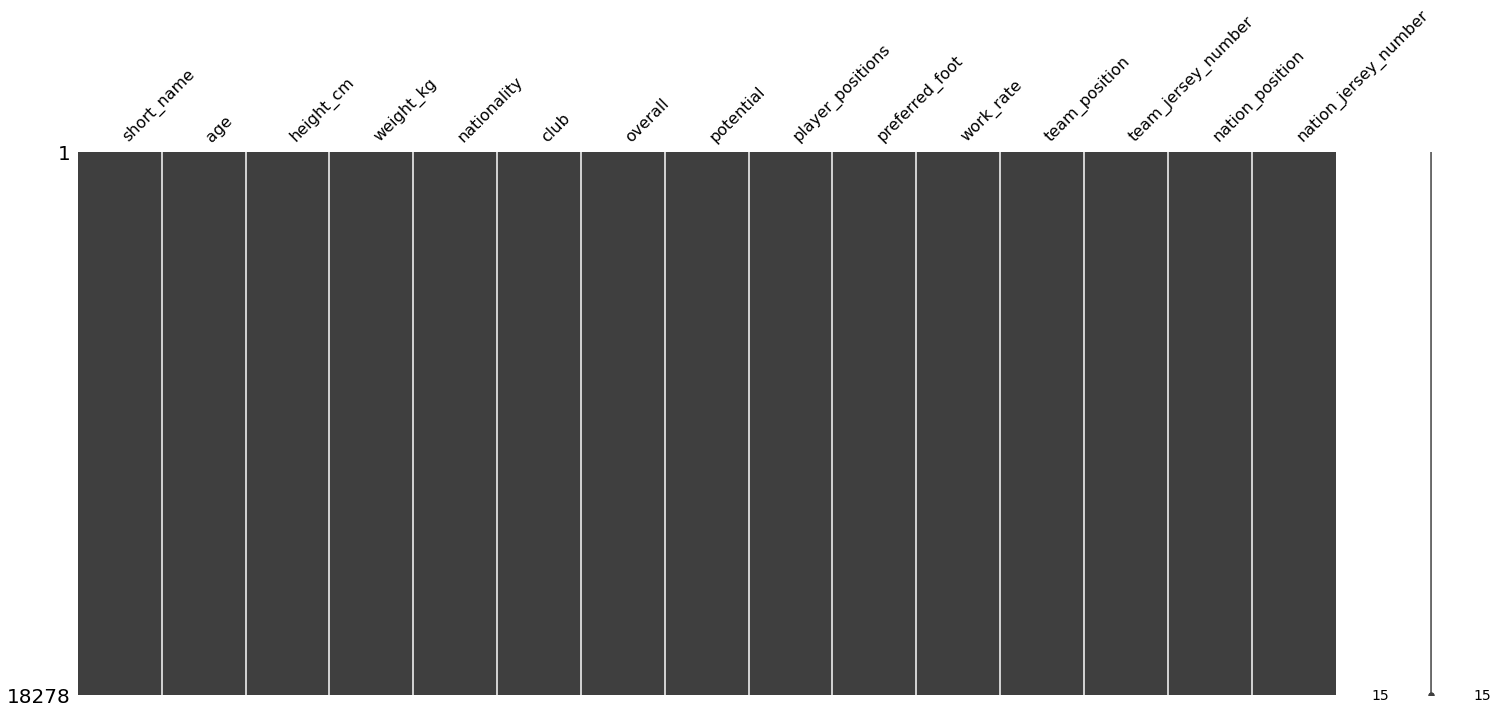

In [ ]:
# Data Visualisation 

#Checking blank spaces 
import missingno as ms
ms.matrix(df2)

QUESTION 2 : Create  feature subsets which show maximum correlation with the dependent variable.

In [ ]:
corr_matrix = df2.corr()
corr_matrix['overall'].sort_values(ascending=False)

overall                 1.000000
potential               0.646650
age                     0.464305
nation_position         0.260015
nation_jersey_number    0.245550
weight_kg               0.156522
height_cm               0.039945
work_rate               0.010359
player_positions       -0.012717
preferred_foot         -0.034474
team_jersey_number     -0.195822
nationality            -0.198918
team_position          -0.259918
club                   -0.543033
short_name             -0.930959
Name: overall, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


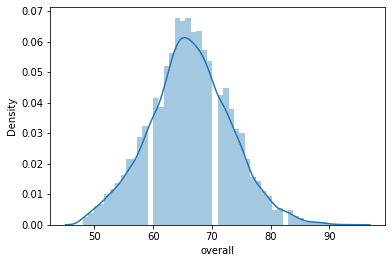

In [ ]:
sns.distplot(df2['overall'])

In [ ]:
corr_matrix = df2.corr()
corr_matrix['overall'].sort_values(ascending=False)

overall                 1.000000
potential               0.646650
age                     0.464305
nation_position         0.260015
nation_jersey_number    0.245550
weight_kg               0.156522
height_cm               0.039945
work_rate               0.010359
player_positions       -0.012717
preferred_foot         -0.034474
team_jersey_number     -0.195822
nationality            -0.198918
team_position          -0.259918
club                   -0.543033
short_name             -0.930959
Name: overall, dtype: float64

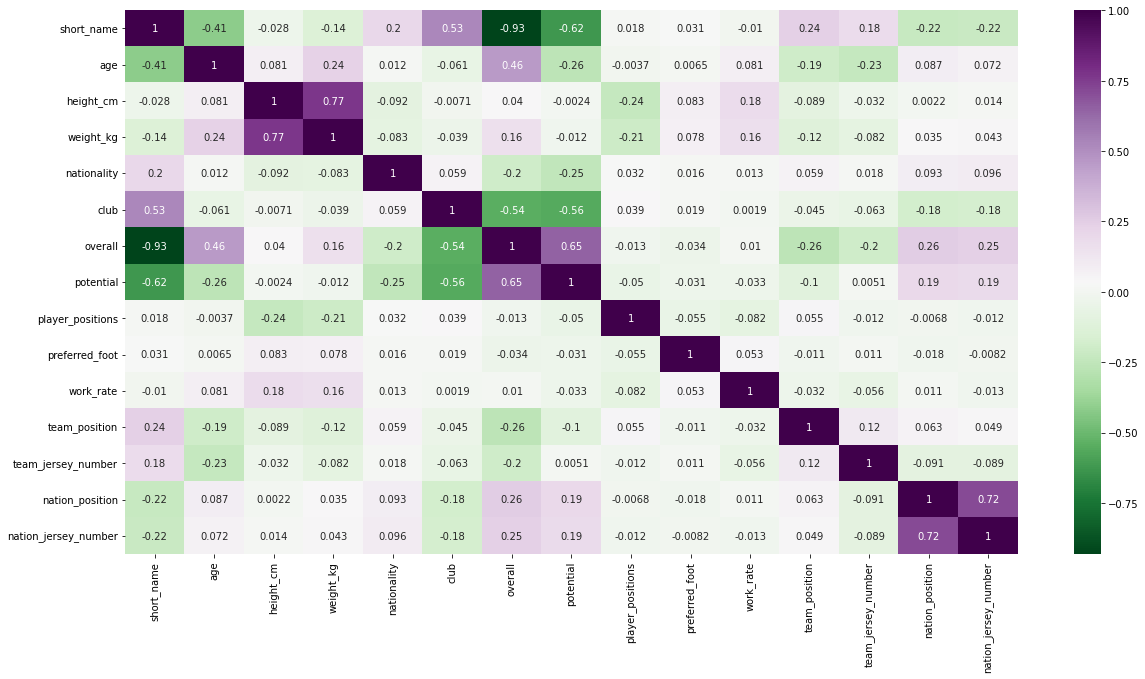

In [ ]:
#plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True,cmap='PRGn_r')

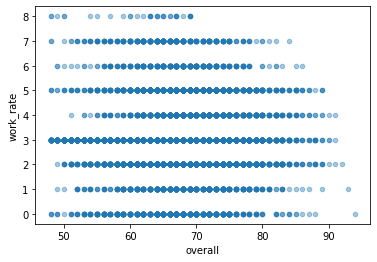

In [ ]:
#Visualising the effect of work rate  to overall
df2.plot(kind='scatter',x='overall',y='work_rate',alpha=0.4)

QUESTION 3 : Create and train a suitable regression machine learning model that predicts the overall rating score of a player based on his attributes. 

In [ ]:
#Define Independent and Dependent variables

X = df2.drop('overall', axis=1)
y = df2.overall

In [ ]:
#3 Split data into into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error ,confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.preprocessing import  StandardScaler


#Scaling

Scale = StandardScaler()
X_sc= Scale.fit_transform(X)
X_sc

array([[-1.69044767,  1.44233274, -1.68159832, ..., -0.59092135,
        -0.2180931 , -0.22224052],
       [-1.69024871,  1.87180879,  0.83439432, ..., -0.77108182,
         0.18161669,  1.86226839],
       [-1.69004975,  0.36864262, -0.94160048, ..., -0.59092135,
         0.58132647,  2.75562936],
       ...,
       [ 1.30311203, -1.34926158,  0.68639475, ...,  1.09057638,
        -0.2180931 , -0.22224052],
       [ 1.76191494, -1.5639996 ,  0.53839519, ...,  0.79030892,
        -0.2180931 , -0.22224052],
       [ 1.7621139 ,  0.15390459,  0.09439648, ...,  1.03052289,
        -0.2180931 , -0.22224052]])

In [ ]:
#Looking for a suitable regressor using Voting classifier

log_reg=LogisticRegression()
nave=GaussianNB()
dtc=DecisionTreeClassifier()
xg=XGBClassifier()
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
voting_clf = VotingClassifier(estimators=[('logistic regression', log_reg),('nave', nave),('Decision Tree Classifier', dtc),('XG Boost', xg),('K nearest neighbours', knn)], voting='hard')
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('logistic regression', LogisticRegression()),
                             ('nave', GaussianNB()),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier()),
                             ('XG Boost', XGBClassifier()),
                             ('K nearest neighbours',
                              KNeighborsClassifier(n_neighbors=7))])

In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_reg, nave, dtc, xg, knn):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression 0.12937636761487964
GaussianNB 0.3974288840262582
DecisionTreeClassifier 0.9354485776805251
XGBClassifier 0.9589715536105032
KNeighborsClassifier 0.9335339168490153


In [ ]:
#this implies XGBClassifier is best algorithm for this dataset 

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
xgb = XGBClassifier() 

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred=xgb.predict(X_test)

QUESTION 4 : Measure the performance of the model and fine tune it as a process of optimisation.

In [ ]:
asc=accuracy_score(y_test, y_pred)

In [ ]:
#Printing the accuracy score of the model 

print('Accuracy Score : ', asc)

Accuracy Score :  0.9589715536105032


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


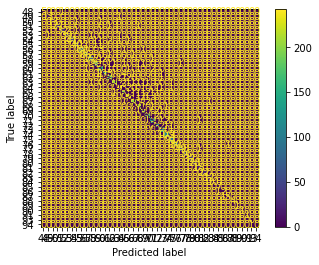

In [ ]:
plot_confusion_matrix(xgb, X_test, y_test)

In [ ]:
# hyperparameter tuning


from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.12047207596081026


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Question 5 : Use the data from another season which was not used during the training to test how good the model is.

In [ ]:
#Repeating all the processes for a different dataset "players_18.csv"

df_tst=pd.read_csv('/content/drive/MyDrive/archive/players_18.csv')
df_tst.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,94,94,95500000,565000,"LW, ST",Right,5,4,5,High/Low,C. Ronaldo,Yes,195800000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2021.0,LS,7.0,90.0,93.0,82.0,90.0,33.0,80.0,NaN,NaN,NaN,...,63,29,95+1,85,85,95+9,22,31,23,7,11,15,14,11,92+3,92+3,92+3,91+3,92+3,92+3,92+3,91+3,90+3,90+3,90+3,90+3,83+3,83+3,83+3,90+3,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,93,93,105000000,565000,RW,Left,5,4,4,Medium/Medium,Messi,Yes,215300000.0,"#Dribbler, #FK Specialist, #Acrobat, #Clinical...",RW,10.0,NaN,2004-07-01,2018.0,RW,10.0,89.0,90.0,86.0,96.0,26.0,61.0,NaN,NaN,NaN,...,48,22,93,90,74,96+2,13,28,26,6,11,15,14,8,89+3,89+3,89+3,92+3,93+3,93+3,93+3,92+3,93+3,93+3,93+3,91+3,84+3,84+3,84+3,91+3,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,94,123000000,280000,LW,Right,5,5,5,High/Medium,Neymar,Yes,236800000.0,"#Speedster, #Dribbler, #Acrobat",LW,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,79.0,95.0,30.0,60.0,NaN,NaN,NaN,...,56,36,90,80,81,92+12,21,24,33,9,9,15,15,11,85+3,85+3,85+3,89+3,89+3,89+3,89+3,89+3,88+3,88+3,88+3,88+3,79+3,79+3,79+3,88+3,64+3,59+3,59+3,59+3,64+3,60+3,47+3,47+3,47+3,60+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,92,92,61000000,230000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,100700000.0,NaN,GK,1.0,NaN,2011-07-01,2021.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,91.0,90.0,95.0,...,29,30,12,70,47,70,10,10,11,91+2,90,95,91,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,30,1987-01-24,182,86,Uruguay,FC Barcelona,92,92,97000000,510000,ST,Right,5,4,4,High/Medium,Normal,Yes,198900000.0,"#Acrobat, #Clinical Finisher",ST,9.0,NaN,2014-07-11,2021.0,LS,9.0,82.0,90.0,79.0,87.0,42.0,81.0,NaN,NaN,NaN,...,78,41,92,84,85,83,30,45,38,27,25,31,33,37,88+4,88+4,88+4,87+4,89+4,89+4,89+4,87+4,87+4,87+4,87+4,86+4,81+4,81+4,81+4,86+4,68+4,66+4,66+4,66+4,68+4,65+4,59+4,59+4,59+4,65+4


In [ ]:
# Viewing the shape 
df_tst.shape

(17592, 104)

In [ ]:
# Dataframe summary
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(11), object(77)
memory usage: 14.0+ MB


In [ ]:
# Calculating correlations 
df_tst.corr()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
sofifa_id,1.000000,-0.721186,-0.086400,-0.183108,-0.429942,0.000618,-0.142524,-0.214347,-0.334124,-0.076656,0.005103,-0.128097,0.167417,0.068012,0.061222,0.156042,-0.241249,-0.345788,-0.186511,-0.211085,-0.332584,-0.384269,-0.412813,-0.303086,-0.368199,-0.238898,-0.471410
age,-0.721186,1.000000,0.077224,0.222471,0.461842,-0.218904,0.081852,0.153027,0.240681,0.061245,-0.030644,0.066879,-0.226130,-0.082035,-0.068971,-0.187455,0.227195,0.334029,0.147295,0.255745,0.410428,0.407497,0.454378,0.374538,0.407109,0.220997,0.553476
height_cm,-0.086400,0.077224,1.000000,0.765194,0.045560,0.007194,0.003092,0.022410,0.044045,-0.182118,-0.443926,0.002083,-0.025224,-0.040929,-0.118255,-0.418096,-0.194657,-0.285153,-0.410679,0.221532,0.488861,0.136328,0.194644,0.105284,0.144578,-0.009113,0.194180
weight_kg,-0.183108,0.222471,0.765194,1.000000,0.139020,-0.011347,0.036700,0.059319,0.085450,-0.146367,-0.390332,0.032286,-0.072403,-0.036751,-0.104219,-0.373616,-0.100913,-0.192879,-0.317661,0.219713,0.569410,0.208564,0.257501,0.207482,0.210119,0.075707,0.281836
overall,-0.429942,0.461842,0.045560,0.139020,1.000000,0.680872,0.625565,0.596650,0.532064,0.201119,0.224600,0.612881,-0.191191,0.166424,-0.074866,0.189124,0.474332,0.661504,0.571891,0.307325,0.508194,0.927846,0.909840,0.748816,0.930124,0.422061,0.926697
potential,0.000618,-0.218904,0.007194,-0.011347,0.680872,1.000000,0.586164,0.519926,0.428393,0.158946,0.217118,0.595320,-0.002396,0.226745,-0.037871,0.258973,0.307484,0.430964,0.459673,0.139114,0.185980,0.705880,0.663650,0.525220,0.697770,0.260349,0.608255
value_eur,-0.142524,0.081852,0.003092,0.036700,0.625565,0.586164,1.000000,0.851201,0.715455,0.160068,0.231637,0.994182,-0.078981,0.189425,-0.051408,0.186139,0.341674,0.423018,0.411085,0.103173,0.226311,0.537501,0.547261,0.426533,0.531310,0.248198,0.499185
wage_eur,-0.214347,0.153027,0.022410,0.059319,0.596650,0.519926,0.851201,1.000000,0.699244,0.140072,0.196411,0.851579,-0.066781,0.128102,-0.079139,0.142699,0.311279,0.394749,0.371258,0.138467,0.248111,0.558791,0.565955,0.451310,0.549211,0.266589,0.522367
international_reputation,-0.334124,0.240681,0.044045,0.085450,0.532064,0.428393,0.715455,0.699244,1.000000,0.121812,0.154354,0.710833,-0.056356,0.071740,-0.104009,0.050510,0.283644,0.364918,0.314119,0.132254,0.213886,0.475220,0.489130,0.373082,0.468407,0.213728,0.470690
weak_foot,-0.076656,0.061245,-0.182118,-0.146367,0.201119,0.158946,0.160068,0.140072,0.121812,1.000000,0.323813,0.156597,-0.031709,0.049639,0.081505,0.145569,0.301641,0.272089,0.298307,-0.129106,-0.029373,0.097202,0.111870,0.164988,0.076214,0.070113,0.093357


In [ ]:
# Checking for missing values

df_tst.isna().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            1979
lcb           1979
cb            1979
rcb           1979
rb            1979
Length: 104, dtype: int64

In [ ]:
# Dropping unecessary columns )
df_tst.columns
z = (df_tst.iloc[: , 78: ]).columns

df3= df_tst.loc[:,~df_tst.columns.isin(z)]
df3.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,94,94,95500000,565000,"LW, ST",Right,5,4,5,High/Low,C. Ronaldo,Yes,195800000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2021.0,LS,7.0,90.0,93.0,82.0,90.0,33.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",85+1,94+1,88+3,83,88,91-1,81,76,77,93,89-2,91-1,89-1,96,63,94+2,95,92,80,92+2,63,29,95+1,85,85,95+9,22,31,23,7,11,15,14,11
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,93,93,105000000,565000,RW,Left,5,4,4,Medium/Medium,Messi,Yes,215300000.0,"#Dribbler, #FK Specialist, #Acrobat, #Clinical...",RW,10.0,NaN,2004-07-01,2018.0,RW,10.0,89.0,90.0,86.0,96.0,26.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (CPU AI Only), S...",77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73-1,59,88,48,22,93,90,74,96+2,13,28,26,6,11,15,14,8
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,94,123000000,280000,LW,Right,5,5,5,High/Medium,Neymar,Yes,236800000.0,"#Speedster, #Dribbler, #Acrobat",LW,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,79.0,95.0,30.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Flair, Speed Dribbler (CPU AI Only), Te...",75,89,62,81,83,96,81,84,75,95,94+1,90,96,88,82,80+2,61,78-1,53,77,56,36,90,80,81,92+12,21,24,33,9,9,15,15,11
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,92,92,61000000,230000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,100700000.0,NaN,GK,1.0,NaN,2011-07-01,2021.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,91.0,90.0,95.0,89.0,60.0,91.0,"GK Long Throw, 1-on-1 Rush, Rushes Out Of Goal...",15,13,25,55,11,30,14,11,59,48,58,61,52,85,35,25,78,44,83,16,29,30,12,70,47,70,10,10,11,91+2,90,95,91,89
4,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,30,1987-01-24,182,86,Uruguay,FC Barcelona,92,92,97000000,510000,ST,Right,5,4,4,High/Medium,Normal,Yes,198900000.0,"#Acrobat, #Clinical Finisher",ST,9.0,NaN,2014-07-11,2021.0,LS,9.0,82.0,90.0,79.0,87.0,42.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Beat Offside Trap, Technical Dribbler (...",77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45,38,27,25,31,33,37


In [ ]:
df3.columns



Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_

In [ ]:
tst_cln = df3.drop([ 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','loaned_from', 'joined',
       'contract_valid_until', 'body_type', 'real_face', 'release_clause_eur', 'player_tags','long_name','skill_moves', 'international_reputation','dob','sofifa_id','player_url', 'sofifa_id', 'player_url','gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','weak_foot', 'value_eur', 'wage_eur' ], axis=1)
tst_cln.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,work_rate,team_position,team_jersey_number,nation_position,nation_jersey_number
0,Cristiano Ronaldo,32,185,80,Portugal,Real Madrid,94,94,"LW, ST",Right,High/Low,LW,7.0,LS,7.0
1,L. Messi,30,170,72,Argentina,FC Barcelona,93,93,RW,Left,Medium/Medium,RW,10.0,RW,10.0
2,Neymar,25,175,68,Brazil,Paris Saint-Germain,92,94,LW,Right,High/Medium,LW,10.0,LW,10.0
3,M. Neuer,31,193,92,Germany,FC Bayern München,92,92,GK,Right,Medium/Medium,GK,1.0,GK,1.0
4,L. Suárez,30,182,86,Uruguay,FC Barcelona,92,92,ST,Right,High/Medium,ST,9.0,LS,9.0


In [ ]:
tst_cln.isna().sum()

short_name                  0
age                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
player_positions            0
preferred_foot              0
work_rate                   0
team_position             236
team_jersey_number        236
nation_position         16443
nation_jersey_number    16443
dtype: int64

In [ ]:
tst_cln = tst_cln.fillna(0.0)

In [ ]:
tst_cln.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,work_rate,team_position,team_jersey_number,nation_position,nation_jersey_number
0,Cristiano Ronaldo,32,185,80,Portugal,Real Madrid,94,94,"LW, ST",Right,High/Low,LW,7.0,LS,7.0
1,L. Messi,30,170,72,Argentina,FC Barcelona,93,93,RW,Left,Medium/Medium,RW,10.0,RW,10.0
2,Neymar,25,175,68,Brazil,Paris Saint-Germain,92,94,LW,Right,High/Medium,LW,10.0,LW,10.0
3,M. Neuer,31,193,92,Germany,FC Bayern München,92,92,GK,Right,Medium/Medium,GK,1.0,GK,1.0
4,L. Suárez,30,182,86,Uruguay,FC Barcelona,92,92,ST,Right,High/Medium,ST,9.0,LS,9.0


In [ ]:
tst_cln.isna().sum()

short_name              0
age                     0
height_cm               0
weight_kg               0
nationality             0
club                    0
overall                 0
potential               0
player_positions        0
preferred_foot          0
work_rate               0
team_position           0
team_jersey_number      0
nation_position         0
nation_jersey_number    0
dtype: int64

In [ ]:
tst_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   short_name            17592 non-null  object 
 1   age                   17592 non-null  int64  
 2   height_cm             17592 non-null  int64  
 3   weight_kg             17592 non-null  int64  
 4   nationality           17592 non-null  object 
 5   club                  17592 non-null  object 
 6   overall               17592 non-null  int64  
 7   potential             17592 non-null  int64  
 8   player_positions      17592 non-null  object 
 9   preferred_foot        17592 non-null  object 
 10  work_rate             17592 non-null  object 
 11  team_position         17592 non-null  object 
 12  team_jersey_number    17592 non-null  float64
 13  nation_position       17592 non-null  object 
 14  nation_jersey_number  17592 non-null  float64
dtypes: float64(2), int6

In [ ]:
tst_cln['short_name'], _ = pd.factorize(tst_cln['short_name'])
tst_cln['preferred_foot'], _ = pd.factorize(tst_cln['preferred_foot'])
tst_cln['work_rate'], _ = pd.factorize(tst_cln['work_rate'])
tst_cln['team_position'], _ = pd.factorize(tst_cln['team_position'])
tst_cln['nation_position'], _ = pd.factorize(tst_cln['nation_position'])
tst_cln['nationality'], _ = pd.factorize(tst_cln['nationality'])
tst_cln['club'], _ = pd.factorize(tst_cln['club'])
tst_cln['player_positions'], _ = pd.factorize(tst_cln['player_positions'])
tst_cln.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,player_positions,preferred_foot,work_rate,team_position,team_jersey_number,nation_position,nation_jersey_number
0,0,32,185,80,0,0,94,94,0,0,0,0,7.0,0,7.0
1,1,30,170,72,1,1,93,93,1,1,1,1,10.0,1,10.0
2,2,25,175,68,2,2,92,94,2,0,2,0,10.0,2,10.0
3,3,31,193,92,3,3,92,92,3,0,1,2,1.0,3,1.0
4,4,30,182,86,4,1,92,92,4,0,2,3,9.0,0,9.0


In [ ]:
tst_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   short_name            17592 non-null  int64  
 1   age                   17592 non-null  int64  
 2   height_cm             17592 non-null  int64  
 3   weight_kg             17592 non-null  int64  
 4   nationality           17592 non-null  int64  
 5   club                  17592 non-null  int64  
 6   overall               17592 non-null  int64  
 7   potential             17592 non-null  int64  
 8   player_positions      17592 non-null  int64  
 9   preferred_foot        17592 non-null  int64  
 10  work_rate             17592 non-null  int64  
 11  team_position         17592 non-null  int64  
 12  team_jersey_number    17592 non-null  float64
 13  nation_position       17592 non-null  int64  
 14  nation_jersey_number  17592 non-null  float64
dtypes: float64(2), int6

In [ ]:
tst_cln['team_jersey_number'] = tst_cln['team_jersey_number'].astype( int ).apply(np.int64)
tst_cln['nation_jersey_number'] = tst_cln['nation_jersey_number'].astype( int ).apply(np.int64)

In [ ]:
tst_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17592 entries, 0 to 17591
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   short_name            17592 non-null  int64
 1   age                   17592 non-null  int64
 2   height_cm             17592 non-null  int64
 3   weight_kg             17592 non-null  int64
 4   nationality           17592 non-null  int64
 5   club                  17592 non-null  int64
 6   overall               17592 non-null  int64
 7   potential             17592 non-null  int64
 8   player_positions      17592 non-null  int64
 9   preferred_foot        17592 non-null  int64
 10  work_rate             17592 non-null  int64
 11  team_position         17592 non-null  int64
 12  team_jersey_number    17592 non-null  int64
 13  nation_position       17592 non-null  int64
 14  nation_jersey_number  17592 non-null  int64
dtypes: int64(15)
memory usage: 2.0 MB


In [ ]:
corr_matrix = tst_cln.corr()
corr_matrix['overall'].sort_values(ascending=False)

overall                 1.000000
potential               0.680872
age                     0.461842
nation_jersey_number    0.247942
nation_position         0.171466
weight_kg               0.139020
work_rate               0.131958
height_cm               0.045560
preferred_foot          0.028550
player_positions       -0.024526
team_position          -0.077780
nationality            -0.170578
team_jersey_number     -0.192040
club                   -0.572089
short_name             -0.926965
Name: overall, dtype: float64

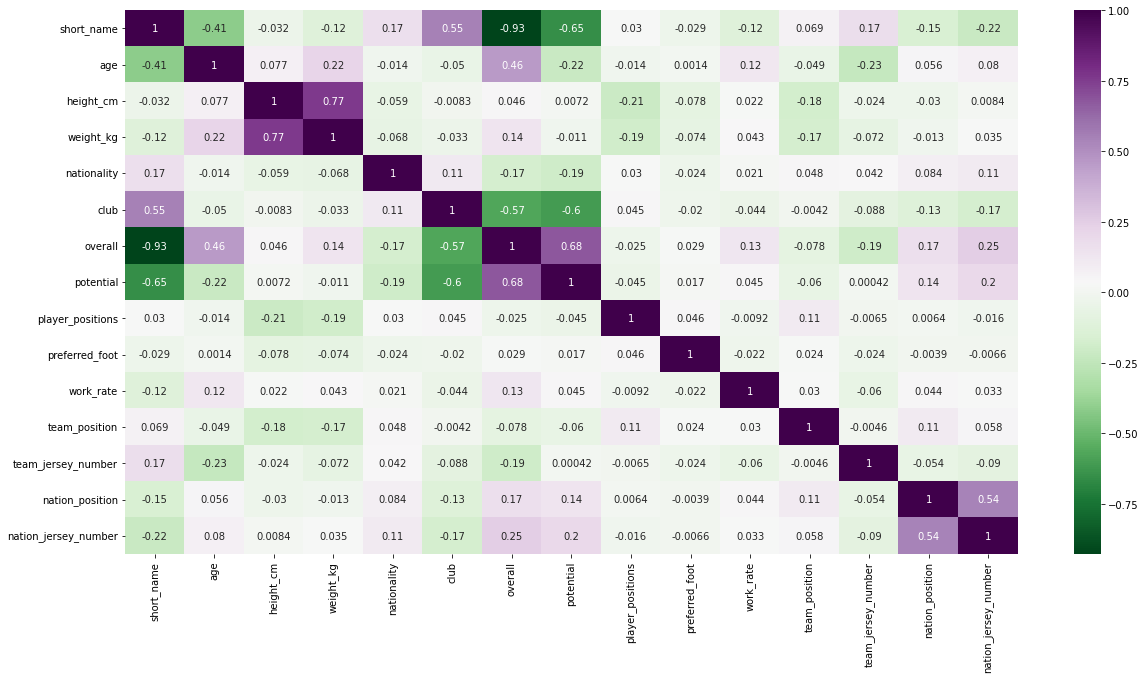

In [ ]:
#plotting a heatmap


plt.figure(figsize=(20,10))
sns.heatmap(tst_cln.corr(),annot=True,cmap='PRGn_r')

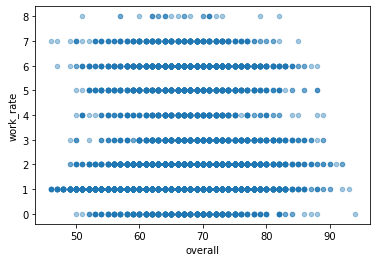

In [ ]:
#Visualising the effect of work rate  to overall


tst_cln.plot(kind='scatter',x='overall',y='work_rate',alpha=0.4)

In [ ]:
#Correlations are similar to those of the players_20 dataset

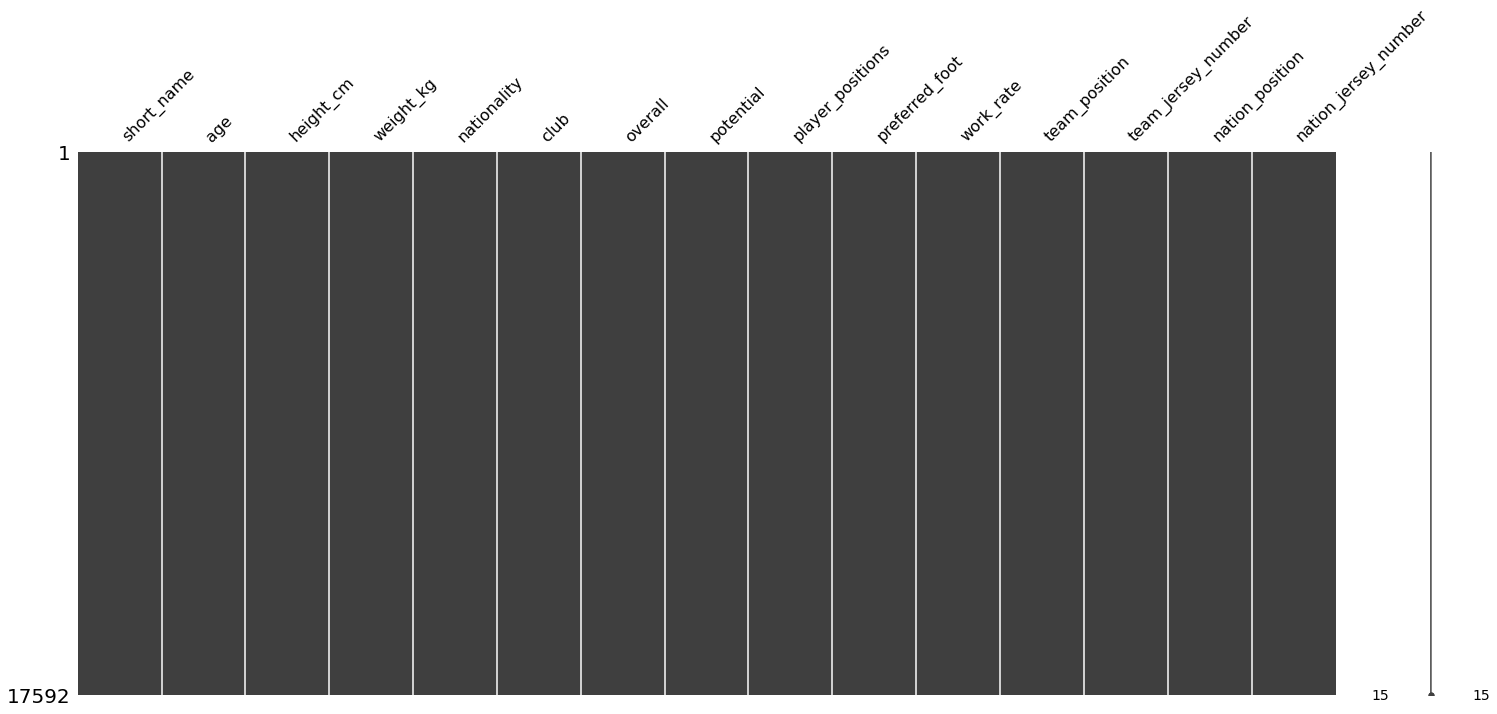

In [ ]:
# Data Visualisation 

#Checking blank spaces 
import missingno as ms
ms.matrix(tst_cln)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


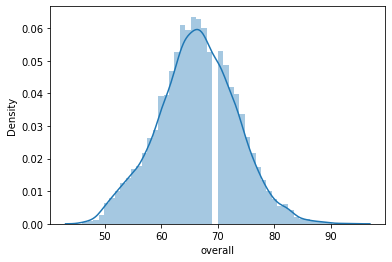

In [ ]:
sns.distplot(tst_cln['overall'])

In [ ]:
#Define Independent and Dependent variables


X_18= tst_cln.drop('overall', axis=1)
y_18= tst_cln.overall

In [ ]:
#3 Split data into into training set and testing set


from sklearn.model_selection import train_test_split
X_18_train, X_18_test, y_18_train, y_18_test = train_test_split(X_18, y_18, test_size=0.2, random_state=42)

In [ ]:
Scale = StandardScaler()
X_sc= Scale.fit_transform(X_18)
X_sc

array([[-1.69339055,  1.47998973,  0.55896591, ..., -0.75845929,
        -4.49276483,  1.79652753],
       [-1.69318314,  1.04674993, -1.68427659, ..., -0.57682141,
        -3.8740046 ,  2.66464027],
       [-1.69297573, -0.03634959, -0.93652909, ..., -0.57682141,
        -3.25524437,  2.66464027],
       ...,
       [ 1.76204677, -1.55268891, -1.38517759, ...,  0.27082202,
        -0.16144324, -0.22906886],
       [ 1.76225417,  4.72928827,  0.55896591, ..., -0.39518353,
        -0.16144324, -0.22906886],
       [ 1.76246158,  0.61351012, -1.23562809, ...,  0.57355182,
        -0.16144324, -0.22906886]])

In [ ]:
voting_clf = VotingClassifier(estimators=[('logistic regression', log_reg),('nave', nave),('Decision Tree Classifier', dtc),('XG Boost', xg),('K nearest neighbours', knn)], voting='hard')
voting_clf.fit(X_18_train, y_18_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('logistic regression', LogisticRegression()),
                             ('nave', GaussianNB()),
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier()),
                             ('XG Boost',
                              XGBClassifier(objective='multi:softprob')),
                             ('K nearest neighbours',
                              KNeighborsClassifier(n_neighbors=7))])

In [ ]:
from sklearn.metrics import accuracy_score 
for clf in (log_reg, nave, dtc, xg, knn):
  clf.fit(X_18_train, y_18_train)
  y_pred = clf.predict(X_18_test)
  print(clf.__class__.__name__, accuracy_score(y_18_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression 0.11395282750781471
GaussianNB 0.39215686274509803
DecisionTreeClassifier 0.9406081273088945
XGBClassifier 0.9602159704461495
KNeighborsClassifier 0.9309462915601023


In [ ]:
xgb_18 = XGBClassifier() 

In [ ]:
xgb_18.fit(X_18_train, y_18_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_18_pred=xgb_18.predict(X_18_test)

In [ ]:
asc_18=accuracy_score(y_18_test, y_18_pred)
print('Accuracy Score : ', asc_18)

Accuracy Score :  0.9602159704461495


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


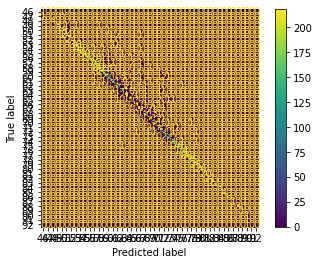

In [ ]:
plot_confusion_matrix(xgb_18, X_18_test, y_18_test)

In [ ]:
# hyperparameter tuning


from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_18, y_18)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.1160172641944865


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#  from the above results that is from the players_20 dataset and from  #
#  the players_19 dataset we can see that there is no big difference    #

Testing how good the model is.........

In [ ]:
#Evaluate metrics for second dataset

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_18_test, y_18_pred)
print('Root Mean Squared Error: ', np.sqrt(mse))
print('Mean Absolute Error: ',mean_squared_error(y_18_test, y_18_pred))

Root Mean Squared Error:  1.1088781199273667
Mean Absolute Error:  1.2296106848536517


In [ ]:
#precision scores

precision_score(y_18_test, y_18_pred, average='macro',zero_division='warn')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8859094730699686

In [ ]:
precision_score(y_18_test, y_18_pred, average='weighted',)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9600407588268797

In [ ]:
count_misclassified = (y_test).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 242197


In [ ]:
count_misclassified = (y_18_test).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 233582


mmm ....

In [ ]:
#downloading the model for the web app 

import pickle
with open('classifier', 'wb') as f:
 pickle.dump(xgb, f) 

Link to youtube video :  coming soon...

Link to Github : coming soon...

Link to Heroku app :coming soon...